In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install wordcloud

In [2]:
import pandas 
import matplotlib
import seaborn

In [3]:
df= pandas.read_csv('scmp.csv')

In [4]:
df[:3]

,headlines,updated_time
0,US officials to meet farm groups as trade war ...,29 Mar 2018 - 5:33pm
1,‘America first’ shouldn’t target Chinese stude...,29 Mar 2018 - 1:19pm
2,Trump seeks French and German support in China...,28 Mar 2018 - 7:51pm


In [5]:
df['updated_time'][0].split('-')

['29 Mar 2018 ', ' 5:33pm']

In [6]:
daytime = []
for time in df['updated_time']:
    daytime.extend(str(time).split('-'))

In [7]:
daytime[:3]

['29 Mar 2018 ', ' 5:33pm', '29 Mar 2018 ']

In [8]:
date = []
for i in range(0,len(daytime)):
    if i % 2 ==0:
        date.append(daytime[i])

In [9]:
date[:3]

['29 Mar 2018 ', '29 Mar 2018 ', '28 Mar 2018 ']

In [10]:
df['date'] = date

In [11]:
df['date'].value_counts()

23 Mar 2018     95
24 Mar 2018      6
28 Mar 2018      3
25 Mar 2018      3
29 Mar 2018      2
27 Mar 2018      2
26 Mar 2018      2
Name: date, dtype: int64

In [12]:
mapping = {
    '23 Mar 2018 ':323,
    '24 Mar 2018 ':324,
    '25 Mar 2018 ':325,
    '28 Mar 2018 ':328,
    '26 Mar 2018 ':326,
    '27 Mar 2018 ':327,
    '29 Mar 2018 ':329
    
}

In [13]:
def cleaning(e):
    return mapping.get(e, 0)

cleaning('29 Mar 2018 ')

329

In [14]:
df['date_num'] = df['date'].apply(cleaning)

In [15]:
df.head(3)

,headlines,updated_time,date,date_num
0,US officials to meet farm groups as trade war ...,29 Mar 2018 - 5:33pm,29 Mar 2018,329
1,‘America first’ shouldn’t target Chinese stude...,29 Mar 2018 - 1:19pm,29 Mar 2018,329
2,Trump seeks French and German support in China...,28 Mar 2018 - 7:51pm,28 Mar 2018,328


In [16]:
all_text = []
for text in df['headlines']:
    all_text.extend(str(text).split())

In [17]:
word_count = {}

In [18]:
for word in all_text:
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] = word_count[word] + 1

In [19]:
pandas.Series(word_count).to_frame().reset_index().head(3)

,index,0
0,-,2
1,...,1
2,11,1


In [20]:
pandas.Series(word_count).sort_values(ascending=False)[:3]

trade    64
US       53
China    52
dtype: int64

In [21]:
df_word_count = pandas.Series(word_count).to_frame().reset_index()

In [22]:
stop_words = set([
    'trade',
    'Trump',
    'Chinese',
    'war',
    'China',
    'US',
    'tariffs',
    'i',
    'me',
    'my',
    'myself',
    'we',
    'our',
    'ours',
    'ourselves',
    'you',
    'your',
    'yours',
    'yourself',
    'yourselves',
    'he',
    'him',
    'his',
    'himself',
    'she',
    'her',
    'hers',
    'herself',
    'it',
    'its',
    'itself',
    'they',
    'them',
    'their',
    'theirs',
    'themselves',
    'what',
    'which',
    'who',
    'whom',
    'this',
    'that',
    'these',
    'those',
    'am',
    'is',
    'are',
    'was',
    'were',
    'be',
    'been',
    'being',
    'have',
    'has',
    'had',
    'having',
    'do',
    'does',
    'did',
    'doing',
    'a',
    'an',
    'the',
    'and',
    'but',
    'if',
    'or',
    'because',
    'as',
    'until',
    'while',
    'of',
    'at',
    'by',
    'for',
    'with',
    'about',
    'against',
    'between',
    'into',
    'through',
    'during',
    'before',
    'after',
    'above',
    'below',
    'to',
    'from',
    'up',
    'down',
    'in',
    'out',
    'on',
    'off',
    'over',
    'under',
    'again',
    'further',
    'then',
    'once',
    'here',
    'there',
    'when',
    'where',
    'why',
    'how',
    'all',
    'any',
    'both',
    'each',
    'few',
    'more',
    'most',
    'other',
    'some',
    'such',
    'no',
    'nor',
    'not',
    'only',
    'own',
    'same',
    'so',
    'than',
    'too',
    'very',
    's',
    't',
    'can',
    'will',
    'just',
    'don',
    'should',
    'now',
    'could'
])
def is_not_stop_word(x):
    return x not in stop_words
df_word_count[
    df_word_count['index'].apply(is_not_stop_word)
].sort_values(by=0, ascending=False).head(3)

,index,0
90,Trump’s,10
307,may,7
446,talks,7


In [23]:
from wordcloud import WordCloud
wc = WordCloud()

In [24]:
w = wc.generate_from_frequencies(word_count)

(-0.5, 399.5, 199.5, -0.5)

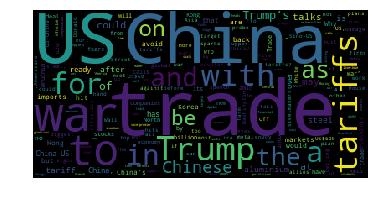

In [25]:
import matplotlib.pyplot as plt
plt.imshow(w)
plt.axis('off')
# word frequency of news report of trade war on SCMP

In [26]:
tttt= [
'23 Mar 2018',     
'24 Mar 2018',      
'25 Mar 2018',      
'26 Mar 2018',     
'27 Mar 2018',      
'28 Mar 2018',      
'29 Mar 2018'
]     

In [27]:
!pip install numpy

In [28]:
import numpy as np
import matplotlib.pyplot as plt

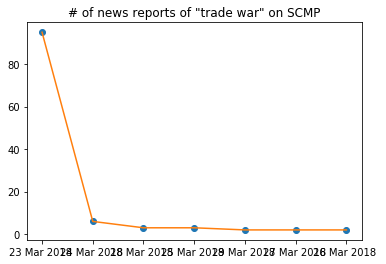

In [29]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(tttt,df['date'].value_counts(),'o')
ax.set_title('# of news reports of "trade war" on SCMP')
df['date'].value_counts().plot()
plt.show()
# Quantity trend of news repots of trade war on SCMP from Mar 23 to Mar 29

In [30]:
df1=df[(df['date_num'] == 323)]

In [31]:
df1.head(3)

,headlines,updated_time,date,date_num
18,‘Collateral damage to Hong Kong unavoidable’ i...,23 Mar 2018 - 11:03pm,23 Mar 2018,323
19,China strikes back with tariffs on US goods af...,23 Mar 2018 - 2:02pm,23 Mar 2018,323
20,Read China's furious response to America's US$...,23 Mar 2018 - 12:34pm,23 Mar 2018,323


In [32]:
daytime2 = []
for time2 in df1['updated_time']:
    daytime2.extend(str(time2).split('-'))

In [33]:
daytime2[:3]

['23 Mar 2018 ', ' 11:03pm', '23 Mar 2018 ']

In [34]:
time = []
for q in range(0,len(daytime2)):
    if q % 2 !=0:
        time.append(daytime2[q])

In [35]:
time[:3]

[' 11:03pm', ' 2:02pm', ' 12:34pm']

In [36]:
df1['time'] = time

/Users/p17437695/Desktop/hw3/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df1.head(3)

,headlines,updated_time,date,date_num,time
18,‘Collateral damage to Hong Kong unavoidable’ i...,23 Mar 2018 - 11:03pm,23 Mar 2018,323,11:03pm
19,China strikes back with tariffs on US goods af...,23 Mar 2018 - 2:02pm,23 Mar 2018,323,2:02pm
20,Read China's furious response to America's US$...,23 Mar 2018 - 12:34pm,23 Mar 2018,323,12:34pm


In [38]:
df1['time'].value_counts()

 1:07pm     35
 12:05pm    33
 12:58pm    16
 12:43pm     6
 2:02pm      1
 3:04pm      1
 3:02pm      1
 11:03pm     1
 12:34pm     1
Name: time, dtype: int64

In [39]:
dddd = [
 '1:07pm',
 '12:05pm', 
 '12:58pm',
 '12:43pm',   
 '3:02pm',
 '11:03pm',   
 '12:34pm',  
 '2:02pm',
 '3:04pm',            
]

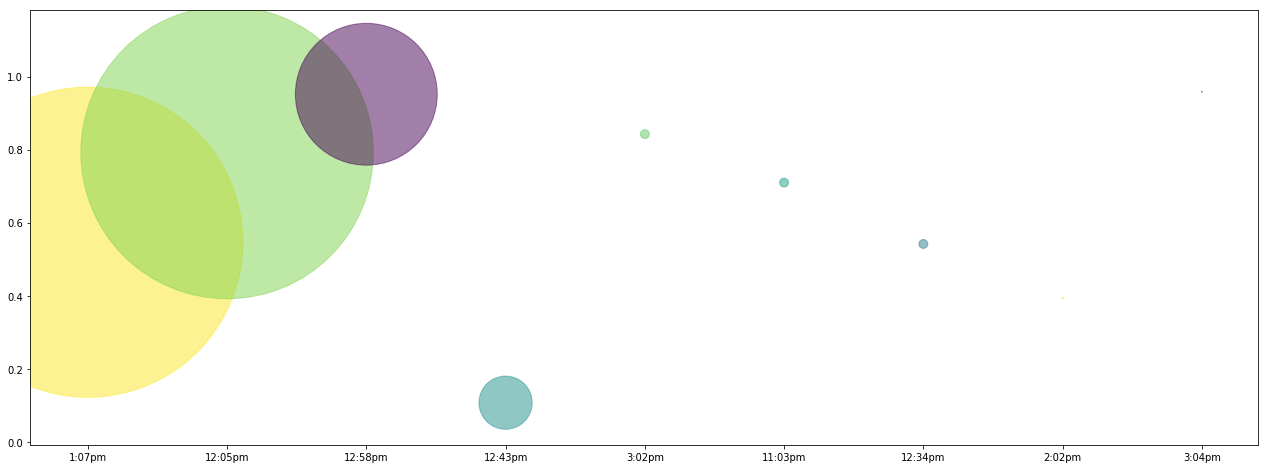

In [40]:
N = 9
x = dddd
y =  np.random.rand(N)
area = [1,1,1,1,1,1,1,1,1]
colors = np.random.rand(N)
plt.figure(figsize = (22,8))
for i in range(0,7):
    area[i] = np.pi *(df1['time'].value_counts()[i]*5)**2
plt.scatter(x,y,s=area, c=colors,alpha=0.5)
plt.show()
# news report of trade war released on SCMP on Mar 23